# Udacity Data Scientist Nanodegree 

## Analyzing Stack Overflow Survey Data

Every year, Stack Overflow conducts a massive survey of people on the site, covering all sorts of information like programming languages, salary, code style and various other information. In the year 2017, they amassed more than 64,000 responses fielded from 213 countries.

## Investigations

There is this rumor that IT guys hack all night and show up late at night. Is it actually true? Is it happening all over the world? Does the contribution to Open Source projects have an impact?

* When do people start to work?
* Do the people start to work earlier in USA or Germany?
* Do people who contribute to Open Source Projects (i.e. Hack all night) start to work later?

## Content
* [Gather Data](#gather_data)
* [Assess Data](#assess_data)
* [Clean Data](#clean_data)
* [Exploratory Analyses](#exploratory_analyses)
* [Explanatory Visualization](#explanatory_visualization)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id = "gather_data"></a>
## Gather Data

The data is manually downloaded from kaggle: https://www.kaggle.com/stackoverflow/so-survey-2017

In [2]:
# Read the table with main survey results, one respondent per row and one column per answer
df = pd.read_csv('survey_results_public.csv')

In [3]:
# Read the table with survey schema, i.e., the questions that correspond to each column name
df_schema = pd.read_csv('survey_results_schema.csv')

<a id = "assess _data"></a>
## Assess Data

In [4]:
df_schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [5]:
df_schema.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 2 columns):
Column      154 non-null object
Question    154 non-null object
dtypes: object(2)
memory usage: 2.5+ KB


In [6]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


### Summary:

* Dataset is very large, 151 columns. Therefore most of this work is done directly at kraggl.
* Some tables show NaN values.

<a id = "clean_data"></a>
## Clean Data

In [8]:
# create a working copy of the dataset
dfn = df.copy()

In [9]:
# As we already saw some NaN values during the assess phase, lets check for them in detail:
dfn['WorkStart'].isnull().sum()

14696

In [10]:
# only take the non nan values
dfn = dfn[dfn['WorkStart'].notna()]

In [11]:
# lets check if it worked
dfn['WorkStart'].isnull().sum()

0

In [12]:
# As we already saw some NaN values during the assess phase, lets check for them in detail:
dfn['Country'].isnull().sum()

0

In [13]:
# create sub sets of the dataset for our countries.
dfn_germany = dfn[dfn['Country'].str.contains('Germany')]
dfn_us = dfn[dfn['Country'].str.contains('United States')]

<a id = "exploratory_analyses"></a>
## Exploratory Analyses

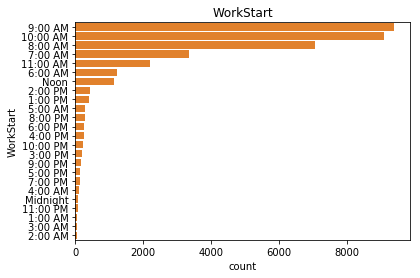

In [14]:
plt.title("WorkStart")
sns.countplot(data = dfn, y = 'WorkStart', order = dfn['WorkStart'].value_counts().index,
             color = sns.color_palette()[1]);

Most people start to work between 7:00 and 12:00. For better understanding we will only present a timeframe between 6:00 and 12:00 AM and sort the values.

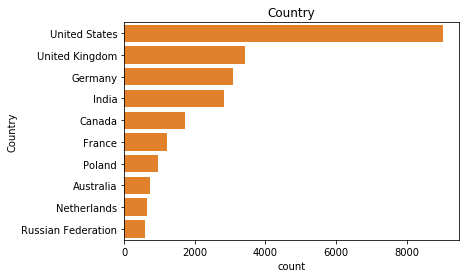

In [15]:
dfn.WorkStart
plt.title("Country")
sns.countplot(data = dfn, y = 'Country', order = dfn['Country'].value_counts().nlargest(10).index,
             color = sns.color_palette()[1]);

There are way to many countrys in the survey. Gladly we will fokus on Germany and United States only.

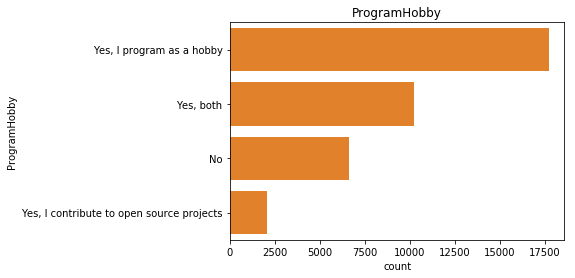

In [16]:
dfn.WorkStart
plt.title("ProgramHobby")
sns.countplot(data = dfn, y = 'ProgramHobby', order = dfn['ProgramHobby'].value_counts().index,
             color = sns.color_palette()[1]);

So most people ony Stack Overflow program as a hobby. But there are also some that contribute to open source projects.

<a id = "explanatory_visualization"></a>
## Explanatory Visualization

In [17]:
# As we generate 3 neraly identical plots we define a function for it.
def plot_workstart(dfn, title, axis):
    ''' Plots selected WorkStart for given dataset, plot titel and axis identifier.'''
    
    work_order = ["6:00 AM", "7:00 AM", "8:00 AM", "9:00 AM", "10:00 AM", "11:00 AM", "Noon"]
    sns.countplot(ax=axis,x = "WorkStart", data = dfn, order = work_order, color = sns.color_palette()[1])
    plt.xlabel('WorkStart');
    plt.ylabel('Count');
    axis.title.set_text(title)
    axis.tick_params(rotation=45)

1. When do people start to work?

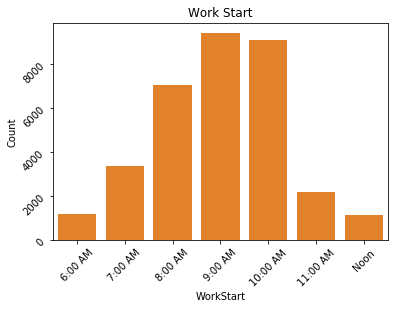

In [18]:
#work_order = ["6:00 AM", "7:00 AM", "8:00 AM", "9:00 AM", "10:00 AM", "11:00 AM", "Noon"]
#sns.countplot(x = "WorkStart", data = dfn, order = work_order, color = sns.color_palette()[1])
#plt.xlabel('WorkStart');
#plt.ylabel('Count');
#plt.title("Work Start");
#plt.xticks(rotation = 45);

fig = plt.figure()  # create a figure object
ax = fig.add_subplot(1, 1, 1)  # create an axes object in the figure
plot_workstart(dfn, "Work Start", ax)

Most people clearly start to work arround 9:00 AM.

2. Do the people start to work earlier in USA or Germany?

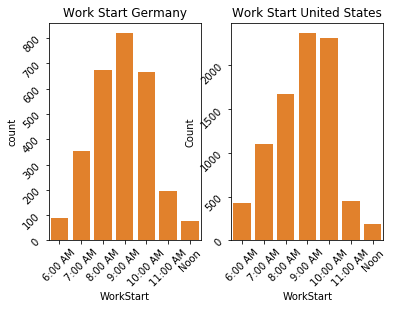

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2)
plot_workstart(dfn_germany, 'Work Start Germany', ax1)
plot_workstart(dfn_us, 'Work Start United States', ax2)

People in the United States tend to start to work later then in Germany.

3. Do people who contribute to Open Source Projects (i.e. Hack all night) start to work later?

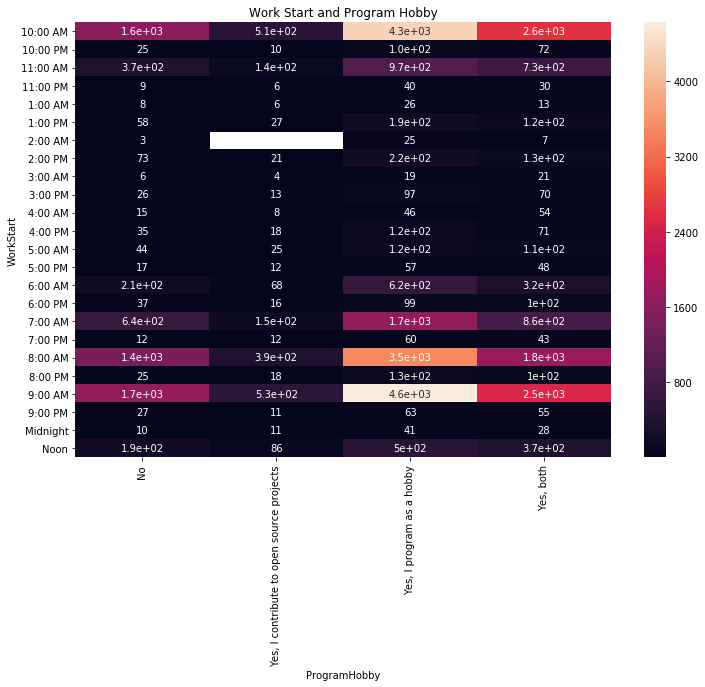

In [20]:
plt.figure(figsize = [12, 8])
temp = dfn.groupby(['ProgramHobby', 'WorkStart']).size()
temp = temp.reset_index(name = 'count')
temp = temp.pivot(index = 'WorkStart', columns = 'ProgramHobby', values = 'count')
sns.heatmap(temp, annot = True);
plt.title('Work Start and Program Hobby');

This one is a little tricky to read. I would say:
* People who contribute to OS projects: 8:00-9:00AM.
* People who program as a hobby, do both or none: 9:00-10:00AM

It seems that people who contribute to OS start wo Work earlier. I guess they are excited to see the comments on their code.